# MIF17 - Analyse d'image
[SUJET DE TP](https://chat-info.univ-lyon1.fr/file-upload/Az3PKaRM6gi7meStA/TP-Project-ImageAnalysis2021.pdf?donwload)

<code style="background:yellow;color:black">-------------STEP 1-------------</code>

Interest in **digital image processing** methods stems from two principal application areas : improvement of pictorial information for human interpretation, and processing of image data for storage, transmission ans representation for autonomous machine perception.

The objective of this part is to get to know the **OpenCv** tool. To do this, We have divided our discovery into 5 parts:

1) image manipulation

2) Noise reduction and filters

3) Spatial smoothing

4) Edge detection



We chose to use the famous image of **Lena** as a test image for the image processing algorithms. 
This image contains an interesting mix of details, uniform regions, and textures, which allows to test the different image processing algorithms. 


In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

#### 1) Image manipulation

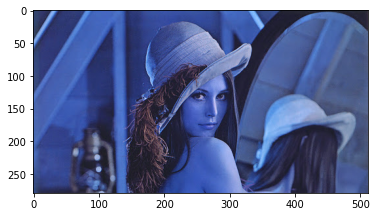

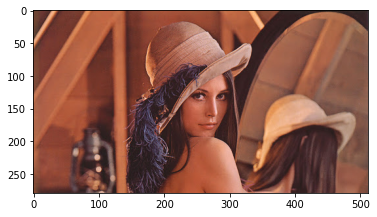

In [3]:
#read the image
image_BGR = cv.imread("data/img/lena.jpg")
# convert to RGB
image_RGB = cv.cvtColor(image_BGR,cv.COLOR_BGR2RGB)

#image display
plt.imshow(image_BGR)
plt.show()
#image display
plt.imshow(image_RGB)
plt.show()

In general, when we work on an image, it will be in RGB format. It is the worst format that it can be to work on an image, because this one is adapted to a sensor that we find in the cameras.

Basically, a camera consists of an assembly of nano-sensor grid. Each sensor is capable of capturing only one wave length among the red, green and blue, hence the RGB representation.
To be manipulated by computer, it is necessary that the color is converted into a digital value. It is for this reason that the concept of color spaces was invented. There are many ways to represent a color. 

The HSV space (hue, saturation, luminosity) is close to the human visual perception of colors. We refer to the shade of the object (the H) when for example we say that it is red or that it is green.

The saturation (the S) represents the purity of the color of the object, so a red object with a strong purity one will seem bright, while with a weak purity it will have rather a washed aspect.

Finally, the luminosity (The V) represents the amount of light emitted on an object, the stronger it is and the clearer the color, while the weaker it is, the darker the color of the object.


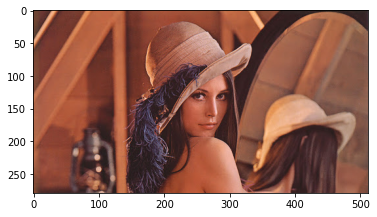

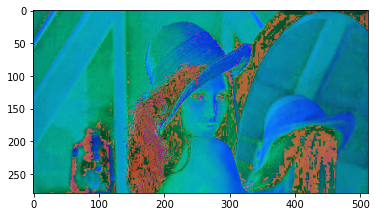

In [19]:
#allows to switch from RGB space to HSV space
image_HSV= cv.cvtColor(image_RGB, cv.COLOR_RGB2HSV)

#image display
plt.imshow(image_RGB)
plt.show()

#image display
plt.imshow(image_HSV)
plt.show()

The simplest images contain a value of intensity, coded on a finite number of levels of gray (we sometimes abbreviate gray levels in NDG). Most often, the number of gray levels is coded on 256 values, the black corresponding to the value 0 and the white to the value 255

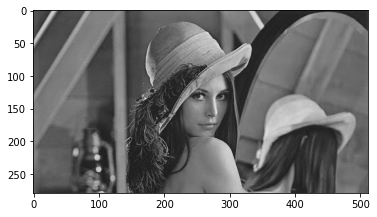

In [20]:
image_gray = cv.cvtColor(image_RGB, cv.COLOR_RGB2GRAY)

#image display
plt.imshow(image_gray, cmap="gray") #Specifying the grayscale color scheme
plt.show()

#### 2) Noise reduction and filter

Gaussian blur (good denoising effect)

Gaussian blur is essentially a mean blur, except that Gaussian blur is weighted average. The closer the distance is, the greater the weight of the point, and the farther the distance is, the smaller the weight is.
In general, Gaussian filtering is the process of weighted averaging of the entire image. The value of each pixel is weighted and averaged by itself and other pixel values in the neighborhood. .

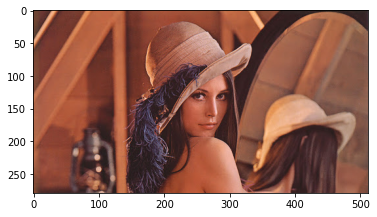

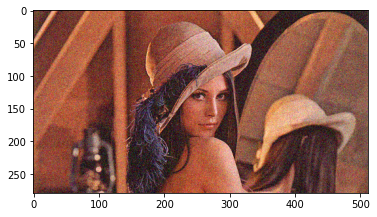

In [22]:
def clamp(pv):
    if pv > 255:
        return 255
    if pv < 0:
        return 0
    else:
        return pv

def gaussian_noise(image):           # 
    h, w, c = image.shape
    for row in range(h):
        for col in range(w):
            s = np.random.normal(0, 20, 3)
            b = image[row, col, 0]   # blue
            g = image[row, col, 1]   # green
            r = image[row, col, 2]   # red
            image[row, col, 0] = clamp(b + s[0])
            image[row, col, 1] = clamp(g + s[1])
            image[row, col, 2] = clamp(r + s[2])
    
#read the image
image_BGR = cv.imread("data/lena.jpg")
# convert to RGB
image_RGB_toGauss = cv.cvtColor(image_BGR,cv.COLOR_BGR2RGB)

gaussian_noise(image_RGB_toGauss)
dst = cv.GaussianBlur(image_RGB_toGauss, (15,15), 0) 

#image display
plt.imshow(image_RGB) 
plt.show()
#image display
plt.imshow(image_RGB_toGauss) 
plt.show()

Image filtering with morphological operations : 2D Convolution
The noises are removed by the blurring.

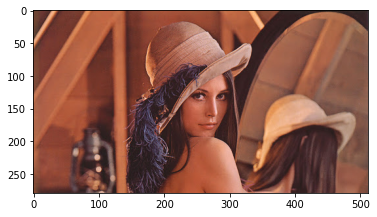

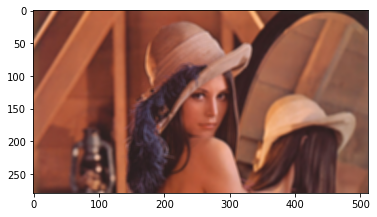

In [23]:
# define kernel 5*5
kernel = np.ones((5,5), np.float32)/25
image_filter2D = cv.filter2D(image_RGB, -1, kernel)

#image display
plt.imshow(image_RGB) 
plt.show()

#image display
plt.imshow(image_filter2D) 
plt.show()

Median filter is something that replace each pixel's value with the median of its neighboring pixels.

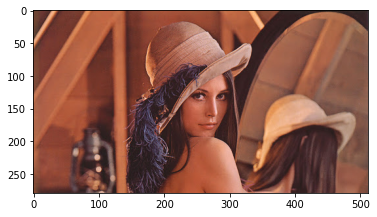

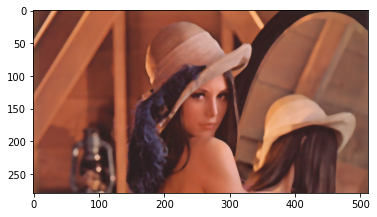

In [25]:
image_median = cv.medianBlur(image_RGB, 5)

#image display
plt.imshow(image_RGB) 
plt.show()

#image display
plt.imshow(image_median) 
plt.show()

bilateral filter : preserve edges of the image

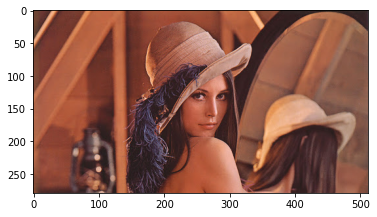

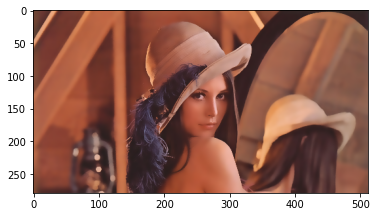

In [26]:
image_bilateral = cv.bilateralFilter(image_RGB, 9, 75, 75)

#image display
plt.imshow(image_RGB) 
plt.show()

#image display
plt.imshow(image_bilateral) 
plt.show()

#### 3) Image averaging
Low pass filter : Removing noise, blurring the image 


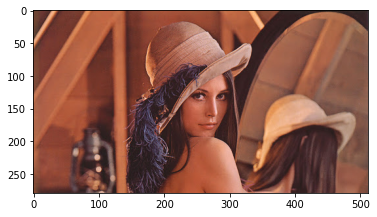

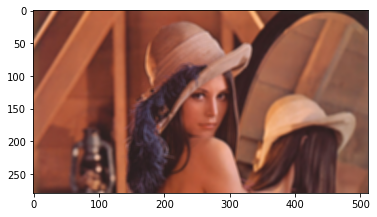

In [24]:
image_blur = cv.blur(image_RGB, (5,5))
#image display
plt.imshow(image_RGB) 
plt.show()

#image display
plt.imshow(image_blur)
plt.show()

#### 4) Edge detection

The canny edge detector is an edge detection operator that uses a multi-stage algorithm to detect a wide range of edges in images.

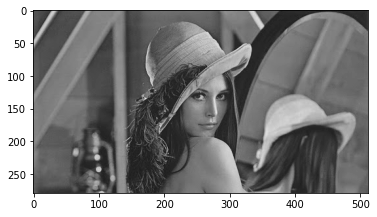

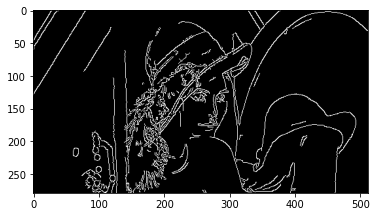

In [28]:
#read the image
image_gray = cv.imread("data/lena.jpg",0)

image_canny= cv.Canny(image_gray, 100, 200)

#image display
plt.imshow(image_gray,cmap="gray") 
plt.show()

#image display
plt.imshow(image_canny,cmap="gray")
plt.show()